<a href="https://colab.research.google.com/github/MHoseinHoushmand/Clustering_by_SLFA/blob/main/Clustering_by_SLFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pdb
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
import matplotlib.pyplot as plt
import operator
import random

In [23]:
def docs_as_tfidf(docs):
  vectorizer = TfidfVectorizer(
     max_df=0.5, #Removing terms that are used in more than 50% of articles
     min_df=5,   #Removing terms that are not used in less than 10 of articles
     stop_words="english",
     #  max_features=1000,
  )
  docs_vector = vectorizer.fit_transform(docs)
  print(len(docs_vector.toarray()[0]))
  return docs_vector.toarray()

In [24]:
categories = [  #Select 4 categories from fetch_20newsgroups dataset
   # "alt.atheism",
    "comp.graphics",
   # "sci.space",
    "rec.sport.hockey",
]
dataset = fetch_20newsgroups( #Preprocessing before using dataset
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target[0:500]
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]
print(f"{len(dataset.data)} documents - {true_k} categories")
print(labels)

1972 documents - 2 categories
[1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0

In [25]:
def cosin_sim(a,b):
   return cosine_similarity([a], [b])[0][0]

**Object oriented Format**

In [26]:
class Cluster:
     def __init__(self):
         self.documents = []
         self.doc_mean = []

     def get_doc_mean(self):
        self.doc_mean = np.average(self.documents, axis=0)
        return self.doc_mean

     def SSE(self):     #Sum of squared error(SSE) as similarity of each documents with the cluster mean in document
         doc_mean = self.get_doc_mean()
         size = len(self.documents)
         sse=0
         for doc in self.documents:
             sse += cosin_sim(doc,doc_mean)**2
         sse = sse/size
         return sse


In [27]:
class Frog:
     def __init__(self,answer,docs_vector,n_clusters):
        self.answer = answer
        self.value = self.fitness(docs_vector,n_clusters)



     def build_clusters(self,docs_vector,n_clusters):#Build clusters for frog
          clusters = []
          for i in range(n_clusters):
             cluster = Cluster()
             clusters.append(cluster)
          for j in range(len(self.answer)):
             if -1 < self.answer[j]:
                clusters[self.answer[j]].documents.append(docs_vector[j])
          return clusters


     def WC(self,clusters):   #Calculate similarity within clusters
        WC = 0
        for cluster in clusters:
            WC += cluster.SSE()
        return WC


     def BC(self,doc_means):#Calculate similarity between clusters
          BC=0
          size = len(doc_means)
          for i in range(size):
              for j in range(i+1,size):
                  BC += cosin_sim(doc_means[i],doc_means[j])**2
          return BC


     def fitness(self,docs_vector,n_clusters):
           doc_means = []
          # pdb.set_trace()
           clusters = self.build_clusters(docs_vector,n_clusters)
           for i in range(n_clusters):
               doc_means.append(
                  clusters[i].get_doc_mean()
               )
           wc = self.WC(clusters) #Calculate similarity within clusters
           bc = self.BC(doc_means) #Calculate similarity between clusters
           fitness = wc/bc
           return fitness


     def cross_over(self,frog_b,docs_vector,n_clusters): #perform 2 points cross over
           frog_size = len(self.answer)
           points = sorted(np.random.choice(np.arange(0,frog_size), size=2, replace=False))
           answer1 = self.answer[:points[0]] + frog_b.answer[points[0]:points[1]] + self.answer[points[1]:]
           answer2 = frog_b.answer[:points[0]] + self.answer[points[0]:points[1]] + frog_b.answer[points[1]:]
           child1 = Frog(answer1,docs_vector,n_clusters)
           child2 = Frog(answer2,docs_vector,n_clusters)
           if child1.value > child2.value: # return best child
               return child1
           else :
               return child2

     def mutation(self,docs_vector,n_clusters):#Select len(answer)/4 of answers and change value
         new_ans = list(self.answer)
         size = int(len(self.answer)/4)
         indexes = np.random.choice(np.arange(0,len(self.answer)), size=size, replace=False)
         values= [random.randint(0, n_clusters-1) for _ in range(size)]
         for i in range(size):
            new_ans[indexes[i]] = values[i]
         child = Frog(tuple(new_ans),docs_vector,n_clusters)
         return  child

In [28]:
class Memplex:
     def __init__(self):
         self.frogs = []

     def best(self):
        if len(self.frogs) > 0:
           return self.frogs[0]

     def worst(self,frogs):
        if len(self.frogs) > 0:
           return self.frogs[len(self.frogs)-1]

     def frogs_to_remove(self,sub_memplex):
         for item in sub_memplex.frogs:
            self.frogs.remove(item)
         return self

     def add_frogs(self,submemplex):
         self.frogs = self.frogs + submemplex.frogs

In [29]:
class Submemplex:
     def __init__(self, memplex ,n_submemplex,memplex_size ):
         self.frogs = []
         self.prob_list = []
         indexs = []
         for i in range(memplex_size):
             for j in range(2*(memplex_size-i)):
                 self.prob_list.append(i)
         k=0
         while(k!=n_submemplex):
            index = random.choice(self.prob_list)
            key = memplex.frogs[index].answer
           # pdb.set_trace()
            if index not in indexs:
                self.frogs.append(memplex.frogs[index])
                indexs.append(index)
                k+=1

     def best(self):
         local_best =  max(self.frogs, key=lambda frog: frog.value)
         return local_best

     def worst(self):
         local_worst =  min(self.frogs, key=lambda frog: frog.value)
         return local_worst


In [30]:
class Population:
     def __init__(self,n_clusters, n_population ,n_docs, docs_vector):
        answers = np.random.randint(0, n_clusters, size=(n_population , n_docs))
        self.frogs = []
        i=0
        for answer in answers:
           frog = Frog(tuple(answer),docs_vector,n_clusters)
           self.frogs.append(frog)
           print(i,frog.value)
           i+=1

     def clear_frogs(self):
        self.frogs.clear()

     # Best frog in population
     def global_best(self,memplexes):
        local_bests = []
        for memplex in memplexes:
            local_best =  max(memplex.frogs, key=lambda frog: frog.value)
            local_bests.append(local_best)
        global_best =  max(local_bests, key=lambda frog: frog.value)
        return global_best

     def shufeling(self,memplexes):#Shufle memplexes and recreate population
         output = []
         for memplex in memplexes:
            output = output+ memplex.frogs
         self.frogs = output

In [31]:
class SFLA:
     def  __init__(self,n_clusters, max_iteration, dataset):
        self.n_clusters = n_clusters
        self.max_iteration =  max_iteration
        self.docs = dataset.data[0:200]
        self.n_population = 400 # Frogs number
        self.memplex_size = 20 #define as m
        self.n_memplex = 20 #define as n
        self.local_iteration = 10 #Iteration As local search
        self.n_submemplex = 5
        self.docs_vector = docs_as_tfidf(self.docs)  #Convert documents as tfidf values
        self.n_docs = len(self.docs)
        self.labels = dataset.target[0:200]


     def create_memplexes(self,population,n_memplex):#ّFrogs are distributed fairly in the memplexes
             population = sorted(population.frogs, key=lambda frog: frog.value)
             memplexes = []
             for i in range(n_memplex):
                 memplex = Memplex()
                 memplexes.append(memplex)
             for i in range(self.n_population):
                 memplexes[i % n_memplex].frogs.append(population[i])
             return memplexes

     def plot_frog(self, frog):
        lsa = TruncatedSVD(n_components=2)
        lsa_matrix = lsa.fit_transform(self.docs_vector)
        labels = frog.answer
        unique_labels, category_sizes = np.unique(labels, return_counts=True)
        true_k = unique_labels.shape[0]
        lsa = TruncatedSVD(n_components=2)
        plt.figure(figsize=(10, 8))
        plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=list(labels), cmap='viridis')

     def evaluation(self ,frog) :
          homogeneity_score = metrics.homogeneity_score(self.labels, frog.answer)
          completeness_score = metrics.completeness_score(self.labels, frog.answer)
          v_measure_score = metrics.v_measure_score(self.labels, frog.answer)
          accuracy_score = metrics.accuracy_score(self.labels, frog.answer)
          print("homogeneity_score: " , homogeneity_score)
          print("completeness_score: ", completeness_score)
          print("v_measure_score: " , v_measure_score)
          print("accuracy_score: " , accuracy_score)



     def search(self):
        population = Population(self.n_clusters, self.n_population, self.n_docs, self.docs_vector)
        for i in range(self.max_iteration):
           memplexes = self.create_memplexes(population,self.n_memplex)
           population.clear_frogs()
           for j in range(self.n_memplex):
               submemplex = Submemplex(memplexes[j],self.n_submemplex,self.memplex_size)
               memplexes[j].frogs_to_remove(submemplex)
               print(i,j,len(memplexes[j].frogs))
               for k in range(self.local_iteration):
                    lfrog_best = submemplex.best()
                    lfrog_worst = submemplex.worst()
                    frog_out = lfrog_worst.cross_over(lfrog_best, self.docs_vector, self.n_clusters)
                    if (lfrog_worst.value < frog_out.value ):
                         submemplex.frogs.remove(lfrog_worst)
                         submemplex.frogs.append(frog_out)
                    else:
                         gfrog_best = population.global_best(memplexes)
                         frog_out = gfrog_best.cross_over(lfrog_worst, self.docs_vector, self.n_clusters)
                         if (lfrog_worst.value<frog_out.value):
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
                         else:
                                      frog_out = gfrog_best.mutation(self.docs_vector,self.n_clusters)
                                      submemplex.frogs.remove(lfrog_worst)
                                      submemplex.frogs.append(frog_out)
               memplexes[j].add_frogs(submemplex)
           gfrog_best = population.global_best(memplexes)
           print(gfrog_best.answer)
           print(gfrog_best.value)
           population.shufeling(memplexes)
        return gfrog_best

In [32]:
sfla = SFLA(2,50,dataset)
best_frog = sfla.search()

380
0 0.16978001237398077
1 0.1879289864687056
2 0.1563536529717823
3 0.15533531717028973
4 0.1656120716940577
5 0.1667796442467952
6 0.16451497017015493
7 0.16879990896650143
8 0.17055415341901925
9 0.16052448215746118
10 0.15771842443159467
11 0.1525990264422732
12 0.15633031230860367
13 0.16233126346587629
14 0.15500716865724687
15 0.17362120080330032
16 0.15286306179848172
17 0.1848212821997568
18 0.18095478682143348
19 0.15992330711720049
20 0.15887248267006082
21 0.1650931456066969
22 0.14560945991641344
23 0.1552280545540697
24 0.18224888906167458
25 0.15133584616106438
26 0.1620837983937735
27 0.17057107108107356
28 0.16561340673470162
29 0.1574670120561495
30 0.17312945575145217
31 0.16484980156234555
32 0.1627185376444385
33 0.1542291430305008
34 0.16060616789094334
35 0.15634849936085932
36 0.16761970352839037
37 0.17358568512460093
38 0.166670535912646
39 0.15735064659084705
40 0.15923554555443842
41 0.1620887904369177
42 0.15312557136618205
43 0.16742165153723887
44 0.1680

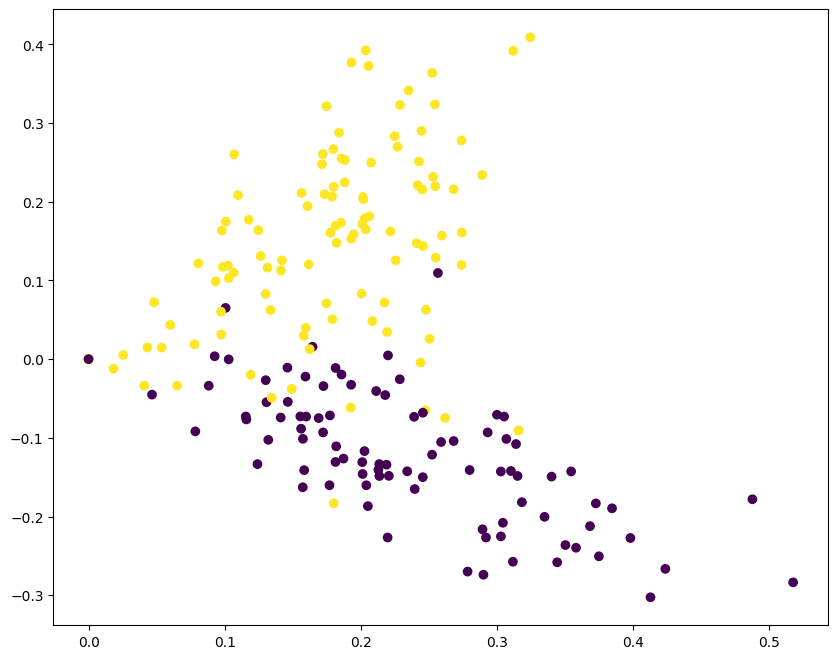

In [33]:
sfla.plot_frog(best_frog)

In [34]:
sfla.evaluation(best_frog)

homogeneity_score:  0.44437671292450676
completeness_score:  0.4467017499367194
v_measure_score:  0.4455361981415519
accuracy_score:  0.13
